<a href="https://colab.research.google.com/github/ckokobean/SFUHS-Computational-Modeling-and-Simulation/blob/master/Catherine_Ko's_Petrol_Consumption_Multiple_Regression_scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd # excel for python 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/bphilhour/SFUHS-Computational-Modeling-and-Simulation/master/petrol_consumption.csv') # create a dataframe

In [0]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [0]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9989978208>,
      dtype=object)

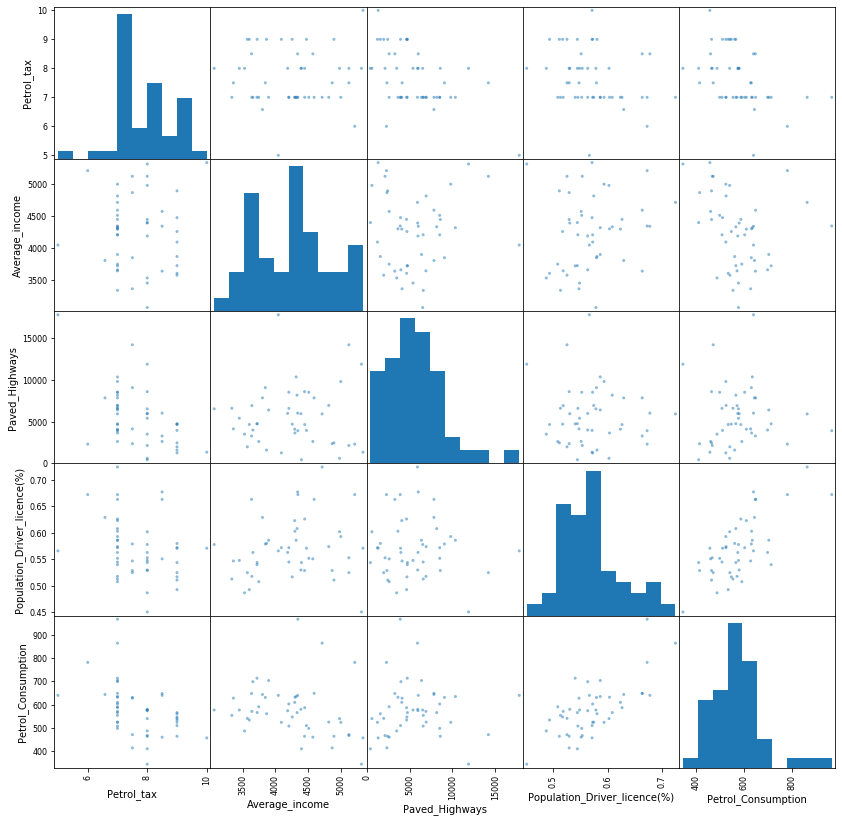

In [0]:
pd.plotting.scatter_matrix(dataset, alpha=0.5, figsize=(14, 14))

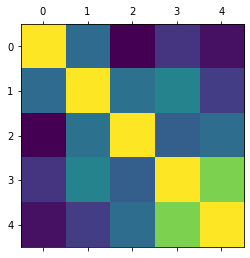

In [0]:
# correlation matrix 
plt.matshow(dataset.corr())
plt.show()

In [0]:
# teach computer what our y and x are
# want to take a subset of the dataframe
# X is a slice of the dataset
X = dataset[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']] # slicing with a list
y = dataset['Petrol_Consumption']

In [0]:
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [0]:
y.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # makes an object regressor; machine that is ready to learn
regressor.fit(X_train, y_train) # tell regressor to fit the best fit line using the X and Y training sets --> gave regressor a new parameter aka coef_

# regressor now has important aparmeter called coef which is an array with 4 parameters.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# make regression.coef_ into a dataframe 
# FOUND COEFFECIENTS

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [0]:
y_pred = regressor.predict(X_test)
y_pred

array([469.39198872, 545.64546431, 589.66839402, 569.7304133 ,
       649.77480909, 646.63116356, 511.60814841, 672.47517717,
       502.07478157, 501.2707342 ])

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734
